In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Plot style
sns.set_style('whitegrid')

# Palette
sns.set_palette('vlag')

In [20]:
gold = pd.read_csv('/content/drive/MyDrive/Thesis_GoldPriceForecasting/Data/Gold Price (2013-2023).csv')
gold

,Date,Price,Open,High,Low,Vol.,Change %
0,12/30/2022,"1,826.20","1,821.80","1,832.40","1,819.80",107.50K,0.01%
1,12/29/2022,"1,826.00","1,812.30","1,827.30","1,811.20",105.99K,0.56%
2,12/28/2022,"1,815.80","1,822.40","1,822.80","1,804.20",118.08K,-0.40%
3,12/27/2022,"1,823.10","1,808.20","1,841.90","1,808.00",159.62K,0.74%
4,12/26/2022,"1,809.70","1,805.80","1,811.95","1,805.55",NaN,0.30%
...,...,...,...,...,...,...,...
2578,01/08/2013,"1,663.20","1,651.50","1,662.60","1,648.80",0.13K,0.97%
2579,01/07/2013,"1,647.20","1,657.30","1,663.80","1,645.30",0.09K,-0.16%
2580,01/04/2013,"1,649.90","1,664.40","1,664.40","1,630.00",0.31K,-1.53%
2581,01/03/2013,"1,675.60","1,688.00","1,689.30","1,664.30",0.19K,-0.85%


In [21]:
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2583 entries, 0 to 2582
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      2583 non-null   object
 1   Price     2583 non-null   object
 2   Open      2583 non-null   object
 3   High      2583 non-null   object
 4   Low       2583 non-null   object
 5   Vol.      2578 non-null   object
 6   Change %  2583 non-null   object
dtypes: object(7)
memory usage: 141.4+ KB


In [22]:
gold['Vol.'].value_counts()    # We can see that the value type of this column is object, and they contain some kind of abbreviations (K)

,count
Vol.,
0.02K,48
0.01K,45
0.04K,42
0.03K,38
0.07K,33
...,...
439.71K,1
450.17K,1
393.10K,1


In [23]:
# Check invalid type in column Vol.
gold[gold['Vol.'].apply(lambda x: isinstance(x, float))]

,Date,Price,Open,High,Low,Vol.,Change %
4,12/26/2022,"1,809.70","1,805.80","1,811.95","1,805.55",NaN,0.30%
26,11/24/2022,"1,755.35","1,753.05","1,758.95","1,752.55",NaN,0.56%
84,09/05/2022,"1,724.80","1,719.20","1,726.60","1,718.75",NaN,0.36%
85,09/04/2022,"1,718.65","1,723.60","1,723.75","1,718.65",NaN,0.06%
2001,04/03/2015,"1,200.90","1,200.90","1,200.90","1,200.90",NaN,0.00%


In [24]:
gold['Change %'].value_counts()    # We can see that the value type of this column is object, and they contain some kind of abbreviations (%)

,count
Change %,
0.00%,29
0.04%,27
0.03%,25
-0.20%,24
-0.14%,23
...,...
-1.52%,1
-1.34%,1
1.87%,1


In [25]:
# Create a function to change the type of column into suitable type that can be used.
# Specifically, change different units of values in Vol. into numeric
# And remove % sign in Change column
def change_type(value):
  if isinstance(value, str):
    if 'K' in value:
      return float(value.replace('K', '')) * 1e3
    elif 'M' in value:
      return float(value.replace('M', '')) * 1e6
    elif 'B' in value:
      return float(value.replace('B', '').astype(float)) * 1e9
    elif '%' in value:
      return float(value.replace('%', ''))
    elif ',' in value:
      return float(value.replace(',', ''))
    else:
      return float(value)
  return value

In [26]:
def preprocess(df):
  df['Date'] = pd.to_datetime(df['Date'])
  df['Vol.'] = df['Vol.'].apply(lambda x: change_type(x))
  df['Change %'] = df['Change %'].apply(lambda x: change_type(x))
  df['Open'] = df['Open'].apply(lambda x: change_type(x))
  df['High'] = df['High'].apply(lambda x: change_type(x))
  df['Low'] = df['Low'].apply(lambda x: change_type(x))
  df['Price'] = df['Price'].apply(lambda x: change_type(x))
  df.rename(columns={'Vol.': 'Volume', 'Change %': 'Change'}, inplace=True)
  df.sort_values(by = 'Date', ascending = True, inplace = True)
  return df

In [27]:
preprocessed_gold = preprocess(gold)
preprocessed_gold

,Date,Price,Open,High,Low,Volume,Change
2582,2013-01-02,1689.9,1675.8,1695.00,1672.10,60.0,0.78
2581,2013-01-03,1675.6,1688.0,1689.30,1664.30,190.0,-0.85
2580,2013-01-04,1649.9,1664.4,1664.40,1630.00,310.0,-1.53
2579,2013-01-07,1647.2,1657.3,1663.80,1645.30,90.0,-0.16
2578,2013-01-08,1663.2,1651.5,1662.60,1648.80,130.0,0.97
...,...,...,...,...,...,...,...
4,2022-12-26,1809.7,1805.8,1811.95,1805.55,NaN,0.30
3,2022-12-27,1823.1,1808.2,1841.90,1808.00,159620.0,0.74
2,2022-12-28,1815.8,1822.4,1822.80,1804.20,118080.0,-0.40
1,2022-12-29,1826.0,1812.3,1827.30,1811.20,105990.0,0.56


In [28]:
preprocessed_gold.reset_index(drop= True, inplace=True)
preprocessed_gold.head()

,Date,Price,Open,High,Low,Volume,Change
0,2013-01-02,1689.9,1675.8,1695.0,1672.1,60.0,0.78
1,2013-01-03,1675.6,1688.0,1689.3,1664.3,190.0,-0.85
2,2013-01-04,1649.9,1664.4,1664.4,1630.0,310.0,-1.53
3,2013-01-07,1647.2,1657.3,1663.8,1645.3,90.0,-0.16
4,2013-01-08,1663.2,1651.5,1662.6,1648.8,130.0,0.97


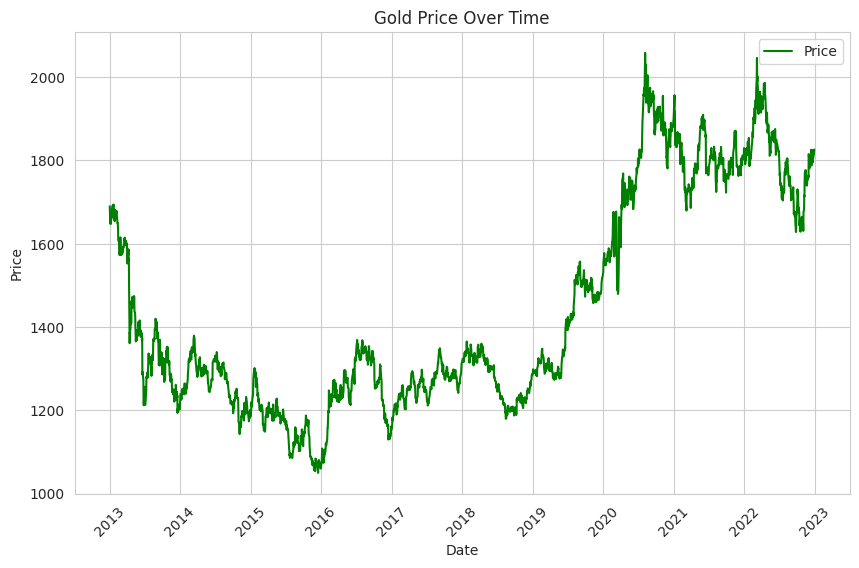

In [29]:
# Line chart that depicts price's movement throughout given time
plt.figure(figsize=(10, 6))
plt.plot(preprocessed_gold['Date'], preprocessed_gold['Price'], label='Price', color = 'green')
plt.title('Gold Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.xticks(rotation = 45)
plt.legend()
plt.show()

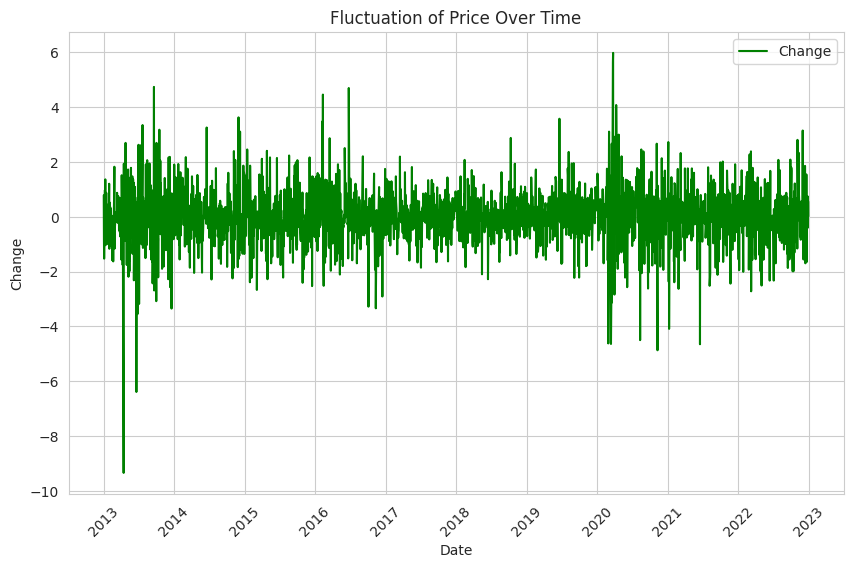

In [30]:
# Line chart that depicts price's fluctuation throughout given time
plt.figure(figsize=(10, 6))
plt.plot(preprocessed_gold['Date'], preprocessed_gold['Change'], label='Change', color = 'green')
plt.title('Fluctuation of Price Over Time')
plt.xlabel('Date')
plt.ylabel('Change')
plt.grid(True)
plt.xticks(rotation = 45)
plt.legend()
plt.show()

In [31]:
preprocessed_gold['Volume'].min()

0.0

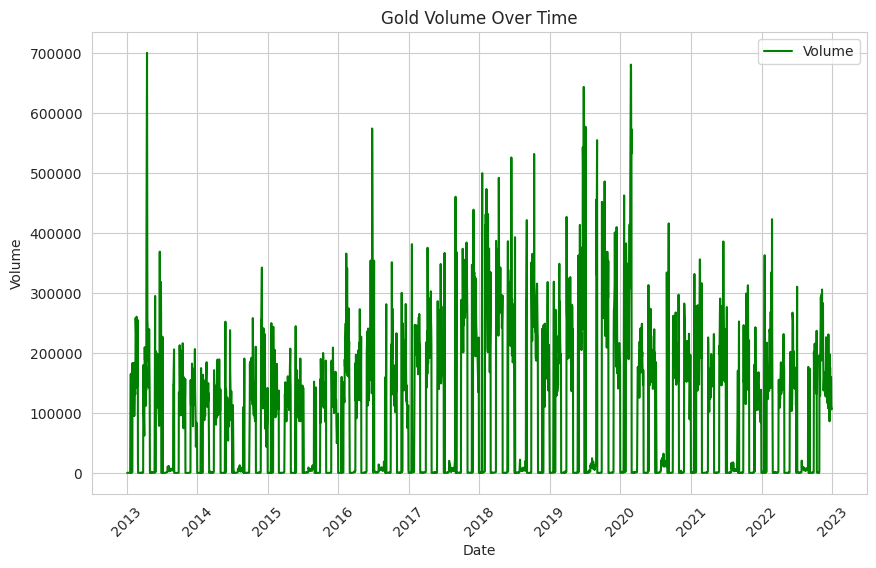

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(preprocessed_gold['Date'], preprocessed_gold['Volume'], label='Volume', color = 'green')
plt.title('Gold Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.xticks(rotation = 45)
plt.legend()
plt.show()

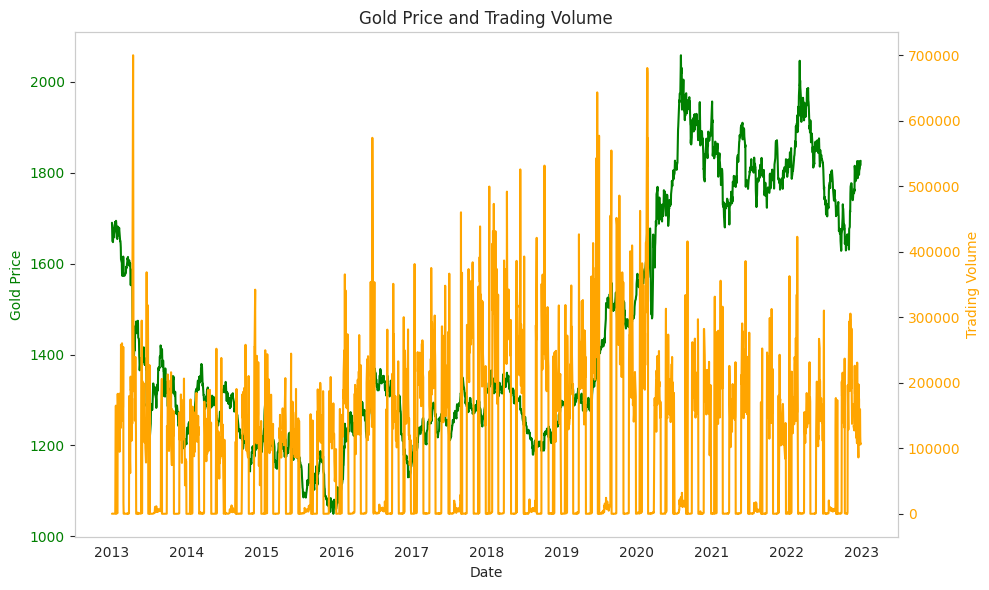

In [33]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the first graph: Stock Price
ax1.plot(preprocessed_gold['Date'], preprocessed_gold['Price'], color='green', label='Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Gold Price', color='green')
ax1.tick_params(axis='y', labelcolor='g')
plt.grid(False)
# Create the second axis that shares the same x-axis
ax2 = ax1.twinx()

# Plot the second graph: Trading Volume
ax2.plot(preprocessed_gold['Date'], preprocessed_gold['Volume'], color='orange', label='Volume')
ax2.set_ylabel('Trading Volume', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')
plt.xticks(rotation=45)
plt.title('Gold Price and Trading Volume')
plt.grid(False)
plt.tight_layout()
plt.show()

In [34]:
# Check correlations between features
preprocessed_gold.corr()

,Date,Price,Open,High,Low,Volume,Change
Date,1.000000,0.728212,0.726881,0.725552,0.730423,0.100223,0.028334
Price,0.728212,1.000000,0.998600,0.999287,0.999396,0.016393,0.032658
Open,0.726881,0.998600,1.000000,0.999327,0.999094,0.015826,-0.014479
High,0.725552,0.999287,0.999327,1.000000,0.998827,0.019841,0.009196
Low,0.730423,0.999396,0.999094,0.998827,1.000000,0.012571,0.013230
Volume,0.100223,0.016393,0.015826,0.019841,0.012571,1.000000,-0.002941
Change,0.028334,0.032658,-0.014479,0.009196,0.013230,-0.002941,1.000000
